### **Python Machine Learning with Scikit-learn and Tenserflow**

-- **This notebook contains code examples and notes**



### Chapter 2 - Training Machine Learning Algorithms for Classification

In [11]:
import numpy as np

class Perceptron(object):
    """Perceptron Classifier
    Parameters
    ------------
    eta : float  
        Learning rate between 0.0 and 1.0
    n_iters : int
        Passes over training data
    random_state : int
        Rondam number generator seed for weights initialization
    Attributes
    ------------

    w_ : 1-d array
        weights after fitting
    b_ : scalar
        bias unit after fitting
    error_ : list
        Number of misclassifications in each epoch
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fitting traning data
        Parameters
        ------------

        X : {array-like}

        y : array-like
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors = int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """calculate the net input (linear transformation of features and weights)"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)



In [2]:
import os
import pandas as pd

### Training a Perceptron model on Iris data



#### Reading Iris dataset

In [3]:
df = pd.read_csv("iris.csv", header=None, encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Plot the Iris data

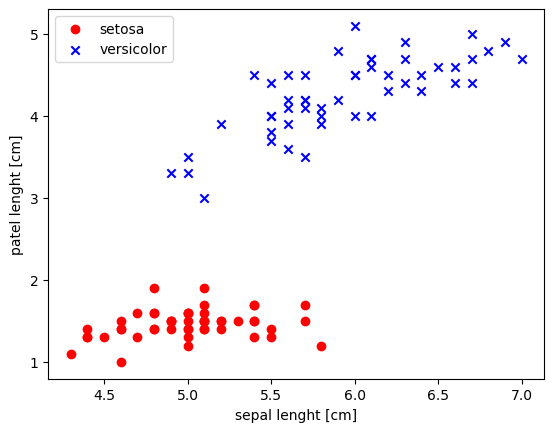

In [4]:
import matplotlib.pyplot as plt
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 1, -1)

# Extract the sepal and petal length
X = df.iloc[0:100, [0,2]].values

# plot data

plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel("sepal lenght [cm]")
plt.ylabel("patel lenght [cm]")

plt.legend(loc='upper left')

plt.show()

In [19]:
#from Perceptron import Perceptron

#ppn = Perceptron(eta=0.01, n_iter=10)

#ppn.fit(X, y)

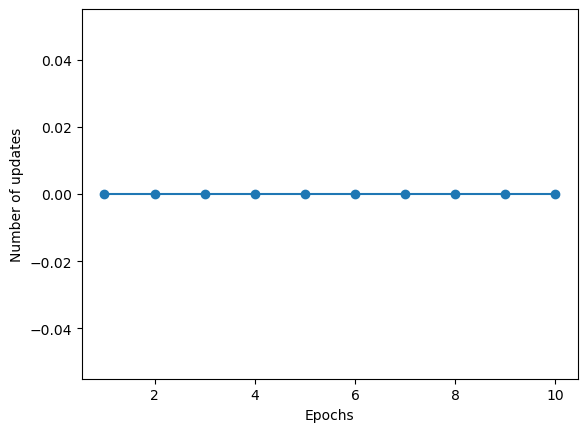

In [12]:
ppn = Perceptron(eta=0.01, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) +1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    #set up market generator and color map
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl, 0], 
                    y = X[y==cl, 1],
                    alpha=0.8,
                    c = colors[idx],
                    marker=markers[idx],
                    label = cl,
                    edgecolors='black')




/var/folders/fs/znzxpngj1wb8jmm96pvx54wh0000gn/T/ipykernel_53572/3571664850.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y==cl, 0],


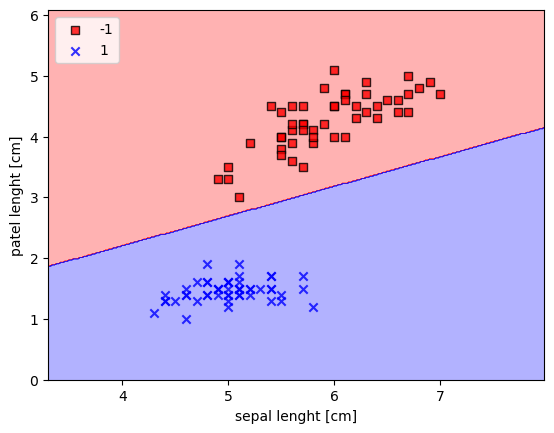

In [14]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal lenght [cm]')
plt.ylabel('patel lenght [cm]')
plt.legend(loc='upper left')
plt.show()

In [36]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):

        rgen = np.random.RandomState(self.random_state)
        
        self.w_ = rgen.normal(loc = 0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(.0)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)

            output = self.activation(X)
            errors = (y - output)
            self.w_ += self.eta * X.T @ errors
            self.b_ += self.eta * errors.sum()
            loss = (errors**2).sum() / 2.0
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        """Predict the class labels"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)



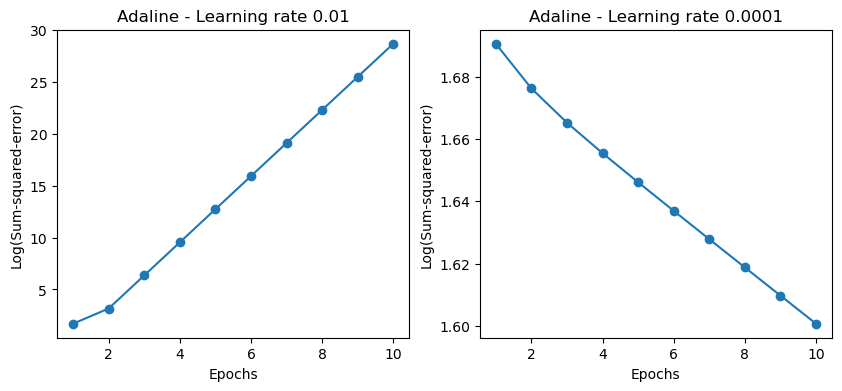

In [16]:
from Adaline import AdalineGD
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_)+1),
           np.log10(ada1.cost_),
           marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Log(Sum-squared-error)')
ax[0].set_title("Adaline - Learning rate 0.01")

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

ax[1].plot(range(1, len(ada2.cost_)+1),
           np.log10(ada2.cost_),
           marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Log(Sum-squared-error)')
ax[1].set_title("Adaline - Learning rate 0.0001")
plt.show()



/var/folders/fs/znzxpngj1wb8jmm96pvx54wh0000gn/T/ipykernel_54159/3571664850.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y==cl, 0],


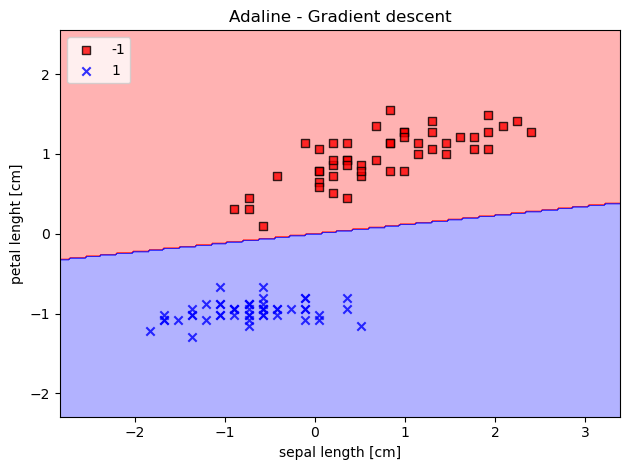

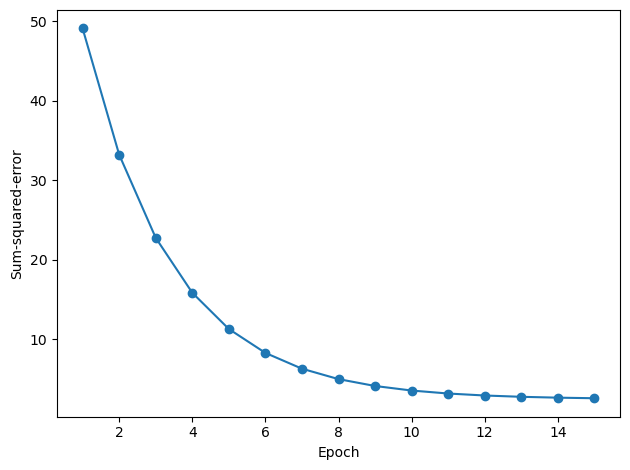

In [17]:
X_std = np.copy(X)

X_std[:,0] = (X_std[:,0] - X_std[:,0].mean())/X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean())/X_std[:,1].std()

ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title("Adaline - Gradient descent")
plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_)+1),
         ada_gd.cost_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()